In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas     as pd
import mplfinance as mpf
import datetime   as datetime
import numpy      as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

In [4]:
msft= yf.download(tickers='MSFT', period = '1mo',interval = '5m');

[*********************100%***********************]  1 of 1 completed


In [9]:
type(msft.index)
msft.head()

pandas.core.indexes.datetimes.DatetimeIndex

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-11-04 09:30:00-04:00,332.890015,333.239990,329.640015,330.549988,330.549988,1619634
2021-11-04 09:35:00-04:00,330.000000,330.589996,329.859985,330.390015,330.390015,966856
2021-11-04 09:40:00-04:00,330.500000,332.299988,330.450104,332.269989,332.269989,760918
2021-11-04 09:45:00-04:00,332.250000,333.100006,332.170013,332.989990,332.989990,526600
2021-11-04 09:50:00-04:00,332.750000,333.179993,332.510010,333.174988,333.174988,498996


In [10]:
msft['Adj Close']

Datetime
2021-11-04 09:30:00-04:00    330.549988
2021-11-04 09:35:00-04:00    330.390015
2021-11-04 09:40:00-04:00    332.269989
2021-11-04 09:45:00-04:00    332.989990
2021-11-04 09:50:00-04:00    333.174988
                                ...    
2021-12-03 15:35:00-05:00    320.594604
2021-12-03 15:40:00-05:00    320.304993
2021-12-03 15:45:00-05:00    320.317505
2021-12-03 15:50:00-05:00    321.679993
2021-12-03 15:55:00-05:00    323.149994
Name: Adj Close, Length: 1603, dtype: float64

In [3]:
# def date_to_mdate(date):
#     """Convert a `date` to a matplotlib date:
    
#     Input: `date` may be any of:
#         (1) parseble string containing a date or datetime as a string,
#         (2) python `datetime.date` or `datetime.datetime`,object
#         (3) pandas.Timestamp object
    
#     Returns a Matplotlib Date: floating point number of days from 01-Jan-0001, plus one day.
#     """
#     if isinstance(date,str):
#         pydt = pd.to_datetime(date).to_pydatetime()
#     elif isinstance(date,pd.Timestamp):
#         pydt = date.to_pydatetime()
#     elif isinstance(date,(datetime.datetime,datetime.date)):
#         pydt = date
#     else:
#         return None
#     return mdates.date2num(pydt)

In [4]:
# def date_to_iloc(dtseries,date):
#     d1s = dtseries.loc[date:]
#     if len(d1s) < 1:
#         sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
#         raise ValueError('User specified line date "'+str(date)+
#                          '" is beyond (greater than) range of plotted data ('+sdtrange+').')
#     d1 = d1s.index[0]
#     d2s = dtseries.loc[:date]
#     if len(d2s) < 1:
#         sdtrange = str(dtseries[0])+' to '+str(dtseries[-1])
#         raise ValueError('User specified line date "'+str(date)+
#                          '" is before (less than) range of plotted data ('+sdtrange+').')
#     d2 = dtseries.loc[:date].index[-1]
#     # If there are duplicate dates in the series, for example in a renko plot
#     # then .get_loc(date) will return a slice containing all the dups, so:
#     loc1 = dtseries.index.get_loc(d1)
#     if isinstance(loc1,slice): loc1 = loc1.start
#     loc2 = dtseries.index.get_loc(d2)
#     if isinstance(loc2,slice): loc2 = loc2.stop - 1
#     return (loc1+loc2)/2.0

In [5]:
%ls -l ../data/

total 1192
-rw-r--r-- 1 dino dino  33851 Dec 28  2020 SP500_20191106_IDayBollinger.csv
-rw-r--r-- 1 dino dino   1097 Nov 11 12:20 SP500_NOV2019_Hist.csv
-rw-r--r-- 1 dino dino  78853 Sep 22  2020 SP500_NOV2019_IDay.csv
-rw-r--r-- 1 dino dino  92731 Apr 23  2021 SP500_NOV2019_IDayRVol.csv
-rw-r--r-- 1 dino dino  35001 Sep 22  2020 SPY_20110701_20120630_Bollinger.csv
-rwxr-xr-x 1 dino dino  33235 Apr  6  2021 jpyusd_barchartdotcom.csv*
-rw-r--r-- 1 dino dino  66004 Sep 22  2020 sample_subplot.png
-rw-r--r-- 1 dino dino 239788 Sep 22  2020 yahoofinance-AAPL-20040819-20180120.csv
-rw-r--r-- 1 dino dino 250345 Sep 22  2020 yahoofinance-GOOG-20040819-20180120.csv
-rw-r--r-- 1 dino dino 161639 Sep 22  2020 yahoofinance-INTC-19950101-20040412.csv
-rw-r--r-- 1 dino dino 189400 Sep 22  2020 yahoofinance-SPY-20080101-20180101.csv
-rw-r--r-- 1 dino dino   6953 Apr 23  2021 yahoofinance-SPY-20200901-20210113.csv


In [6]:
# Read in daily data for the S&P 500 from November of 2019: 
iday = pd.read_csv('../data/SP500_NOV2019_IDayRVol.csv',index_col=0,parse_dates=True)
iday.index.name = 'DateTime'
print('===  iday  ===')
iday.shape
iday.iloc[[0,1,-2,-1]]

#daily = pd.read_csv('../data/yahoofinance-SPY-20200901-20210113.csv',index_col=0,parse_dates=True)
daily = pd.read_csv('../data/yahoofinance-SPY-20080101-20180101.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.drop('Adj Close',axis=1,inplace=True)
print('\n\n===  daily  ===')
daily.shape
daily.iloc[[0,-1]]
daily = daily.loc['2010-1-1':'2012-1-1',:]
daily.shape
daily.iloc[[0,-1]]

===  iday  ===


(1563, 5)

,Open,Close,High,Low,Volume
DateTime,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,2209795
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,1739410
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,1231718
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,1023516




===  daily  ===


(2519, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,147.100006,147.610001,146.059998,146.210007,108126800
2017-12-29,268.529999,268.549988,266.640015,266.859985,96007400


(504, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600
2011-12-30,126.019997,126.330002,125.500000,125.500000,95599000


In [12]:
df = daily
df.head()
df.tail()
df.shape

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800


,Open,High,Low,Close,Volume
Date,,,,,
2011-12-23,125.669998,126.430000,125.410004,126.389999,92187200
2011-12-27,126.169998,126.820000,126.059998,126.489998,86075700
2011-12-28,126.510002,126.529999,124.730003,124.830002,119107100
2011-12-29,125.239998,126.250000,124.860001,126.120003,123507200
2011-12-30,126.019997,126.330002,125.500000,125.500000,95599000


(504, 5)

In [13]:
df['Date'] = df.index.values

In [14]:
df.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,2010-01-04
2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,2010-01-05
2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,2010-01-06
2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,2010-01-07
2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,2010-01-08


In [17]:
dates = []
dates.append(df['Date'].iloc[10])
dates.append(df['Date'].iloc[20])
dates.append(df['Date'].iloc[30])
dates

[Timestamp('2010-01-19 00:00:00'),
 Timestamp('2010-02-02 00:00:00'),
 Timestamp('2010-02-17 00:00:00')]

In [24]:
df['Close'][df['Close'] > 113.43]

Date
2010-01-05    113.629997
2010-01-06    113.709999
2010-01-07    114.190002
2010-01-08    114.570000
2010-01-11    114.730003
                 ...    
2011-12-23    126.389999
2011-12-27    126.489998
2011-12-28    124.830002
2011-12-29    126.120003
2011-12-30    125.500000
Name: Close, Length: 375, dtype: float64

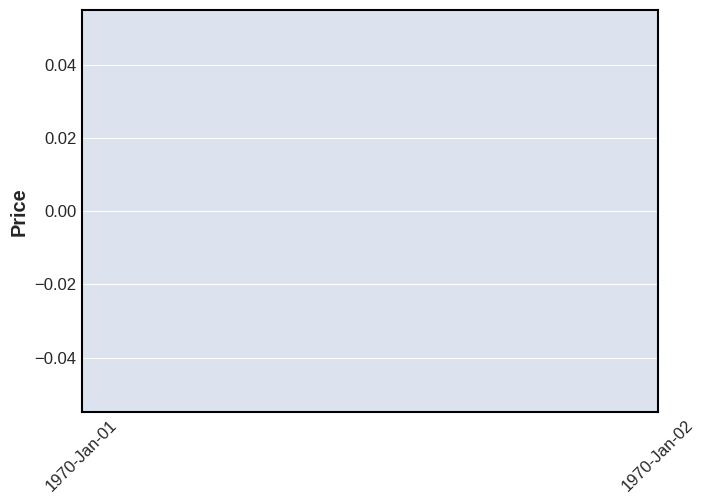

In [18]:
mpf.plot(daily,xlim=('2009-05-10','2012-12-10'),show_nontrading=True)

In [8]:
daily.index
type(daily.index[0])

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
print('---')
dt1 = pd.to_datetime('2012-12-10')
type(dt1)
dt1
print('---')
dt2 = datetime.datetime(2012,12,10)
type(dt2)
dt1 == dt2
type(dt1) == type(dt2)
print('---')
dt3 = pd.to_datetime('2012-12-10').to_pydatetime()
type(dt3)
dt3
print('---')
dt3 == dt2
type(dt3) == type(dt2)

---


pandas._libs.tslibs.timestamps.Timestamp

Timestamp('2012-12-10 00:00:00')

---


datetime.datetime

True

False

---


datetime.datetime

datetime.datetime(2012, 12, 10, 0, 0)

---


True

True

In [10]:
xlim1 = ['2009-05-10','2012-12-10']
xlim2 = [pd.to_datetime(d) for d in xlim1]
xlim3 = [d.to_pydatetime() for d in xlim2]

In [11]:
for xlim in xlim1,xlim2,xlim3:
    type(xlim[0])

str

pandas._libs.tslibs.timestamps.Timestamp

datetime.datetime

---

## TODO:  Why does adding `volume=True` make it so much slower?!

---

In [12]:
def novol():
    for xlim in xlim1,xlim2,xlim3:
        mpf.plot(daily,xlim=xlim,show_nontrading=True,figsize=(6,3))
def withvol():
    for xlim in xlim1,xlim2,xlim3:
        mpf.plot(daily,xlim=xlim,show_nontrading=True,figsize=(6,3),volume=True)
def apvol():
    for xlim in xlim1,xlim2,xlim3:
        ap = mpf.make_addplot(daily.Volume,type='line',panel=1)
        mpf.plot(daily,xlim=xlim,show_nontrading=True,figsize=(6,3),addplot=ap)

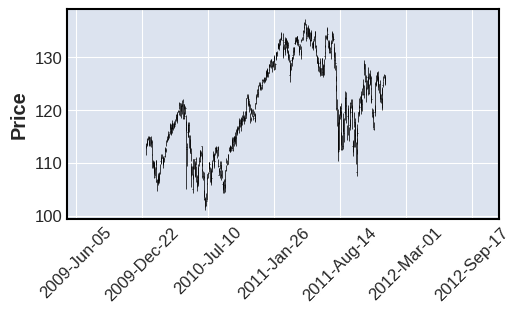

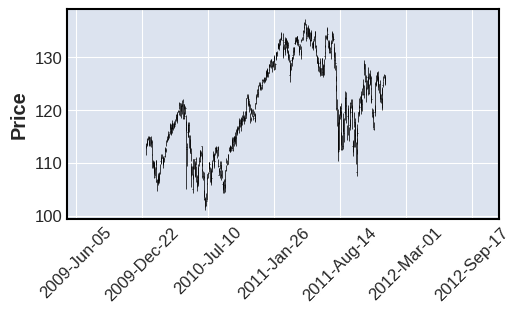

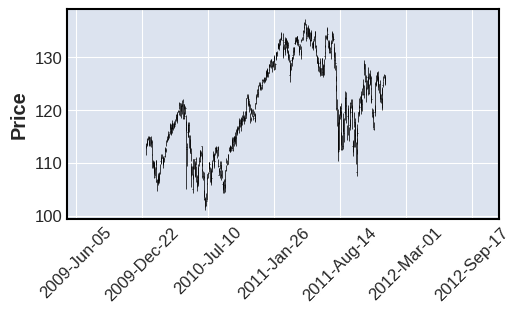

845 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [13]:
%timeit -n1 -r1 novol()

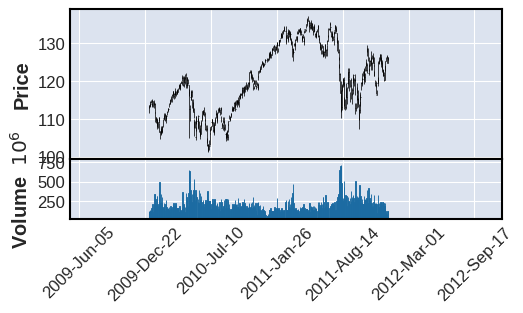

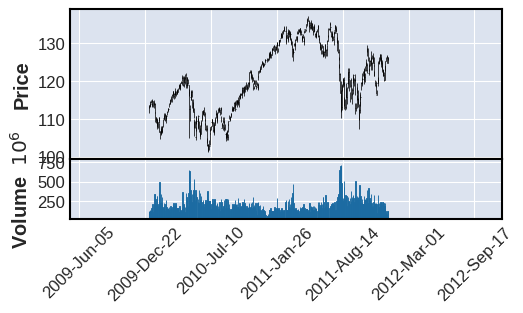

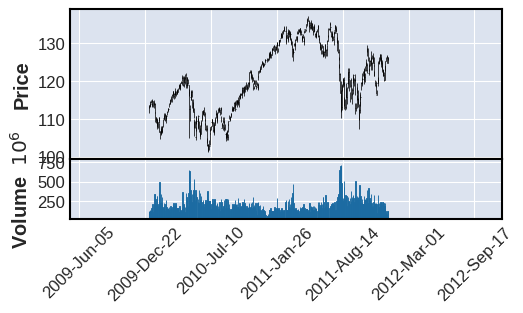

8.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%timeit -n1 -r1 withvol()

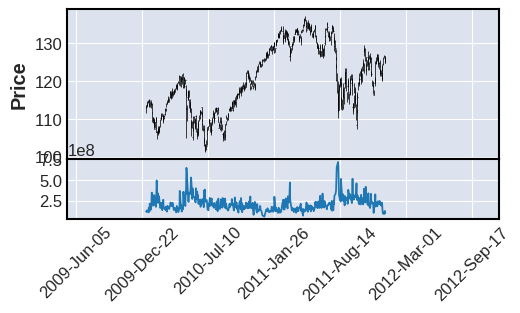

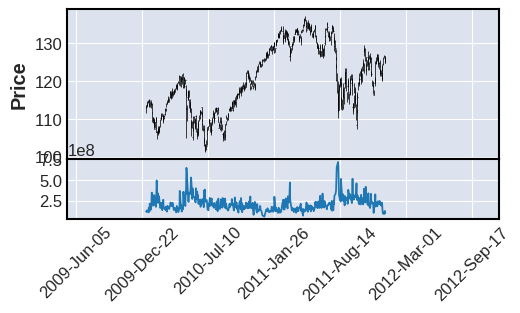

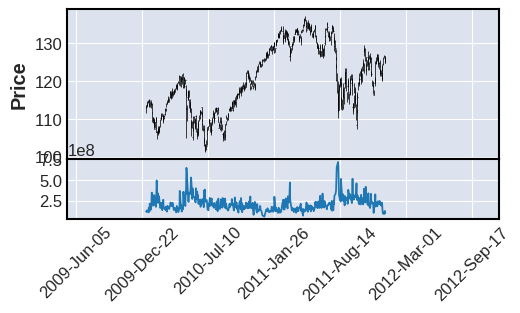

1.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
%timeit -n1 -r1 apvol()

In [16]:
import matplotlib.pyplot as plt
import random

In [17]:
x = [x for x in range(0,150)]
y = [random.randint(10,30) for y in range(0,150)]

In [18]:
def pbar():
    fig = plt.figure(figsize=(5,2))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    x = [x for x in range(0,150)]
    y = [random.randint(10,30) for y in range(0,150)]
    ax.bar(x,y)
    
def pline():
    fig = plt.figure(figsize=(5,2))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    x = [x for x in range(0,150)]
    y = [random.randint(10,30) for y in range(0,150)]
    ax.plot(x,y)

In [19]:
#%timeit -n1 -r1 pline()
#%timeit -n1 -r1 pbar()

In [20]:
import timeit

In [21]:
%%capture
timeline = timeit.timeit(pline,number=5)
timebar  = timeit.timeit(pbar,number=5)

In [22]:
print('timeline=',timeline)
print('timebar =',timebar)
print('\ntimebar/timeline=',timebar/timeline)

timeline= 0.11310889996821061
timebar = 1.1814655000343919

timebar/timeline= 10.44538051706315
